In [79]:
pip install yfinance

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

In [81]:
stocks = ['IBM','AMZN','BA','^GSPC']
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2022, 3, 27)
stock_prices = yf.download(stocks, start=start ,end = end, interval='1d')

[*********************100%***********************]  4 of 4 completed


In [82]:
stock_prices.head()

Adj Close                                          Close  \
                  AMZN         BA        IBM        ^GSPC        AMZN   
Date                                                                    
2010-01-04  133.899994  43.777557  82.858444  1132.989990  133.899994   
2010-01-05  134.690002  45.211353  81.857513  1136.520020  134.690002   
2010-01-06  132.250000  46.582806  81.325783  1137.140015  132.250000   
2010-01-07  130.000000  48.468563  81.044273  1141.689941  130.000000   
2010-01-08  133.520004  48.001019  81.857513  1144.979980  133.520004   

                                                      High             ...  \
                   BA         IBM        ^GSPC        AMZN         BA  ...   
Date                                                                   ...   
2010-01-04  56.180000  126.625237  1132.989990  136.610001  56.389999  ...   
2010-01-05  58.020000  125.095604  1136.520020  135.479996  58.279999  ...   
2010-01-06  59.779999  124.282982  1137.140015  134.729996  59.990002  ...   
2010-01-07  62.200001  123.852776  1141.689941  132.320007  62.310001  ...   
2010-01-08  61.599998  125.095604  1144.979980  133.679993  61.779999  ...   

                   Low                     Open                         \
                   IBM        ^GSPC        AMZN         BA         IBM   
Date                                                                     
2010-01-04  125.095604  1116.560059  136.250000  55.720001  125.411087   
2010-01-05  124.378586  1129.660034  133.429993  56.250000  125.889099   
2010-01-06  124.101341  1133.949951  134.600006  58.230000  124.933075   
2010-01-07  123.240921  1131.319946  132.009995  59.509998  124.158699   
2010-01-08  123.374763  1136.219971  130.559998  61.540001  123.393883   

                           Volume                                 
                  ^GSPC      AMZN        BA      IBM       ^GSPC  
Date                                                              
2010-01-04  1116.560059   7599900   6186700  6438444  3991400000  
2010-01-05  1132.660034   8851900   8867800  7156104  2491020000  
2010-01-06  1135.709961   7178800   8836500  5863144  4972660000  
2010-01-07  1136.270020  11030200  14379100  6109268  5270680000  
2010-01-08  1140.520020   9830500   7146600  4390271  4389590000  

[5 rows x 24 columns]

In [83]:
stock_prices = stock_prices['Close']

In [84]:
stock_prices.head()

,AMZN,BA,IBM,^GSPC
Date,,,,
2010-01-04,133.899994,56.180000,126.625237,1132.989990
2010-01-05,134.690002,58.020000,125.095604,1136.520020
2010-01-06,132.250000,59.779999,124.282982,1137.140015
2010-01-07,130.000000,62.200001,123.852776,1141.689941
2010-01-08,133.520004,61.599998,125.095604,1144.979980


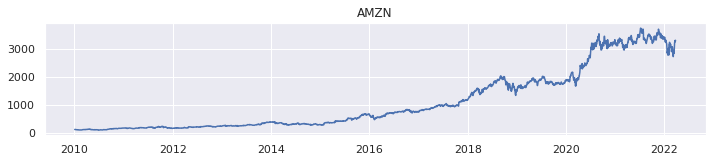

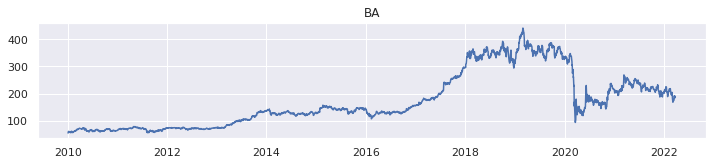

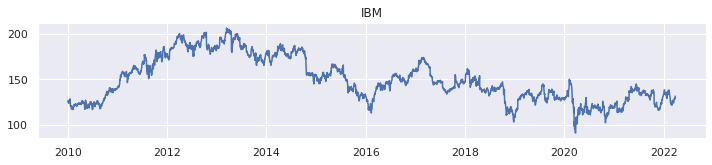

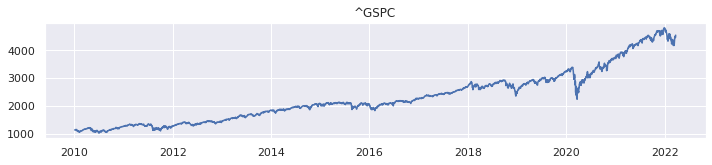

In [85]:
for i, stock in enumerate(stock_prices.columns, start=1):
    sns.set
    plt.figure(figsize=(10, 10))
    plt.subplot(5, 1, i)
    plt.plot(stock_prices[stock])
    plt.title(f"{stock}")
    plt.tight_layout()
    plt.show()

Before moving on to the model we have to make sure the data we are using is stationary. And based on the visualizations above wee can see that each individual stock price is not stationary by looking with the naked eye. A quick fix we have used before to remove stationarity in the the data would be to used the "difference in stock prices" instead of just the stock price itself.  

In [86]:
ibm_diff = stock_prices.IBM.diff().dropna()
amzn_diff = stock_prices.AMZN.diff().dropna()
ba_diff = stock_prices.BA.diff().dropna()

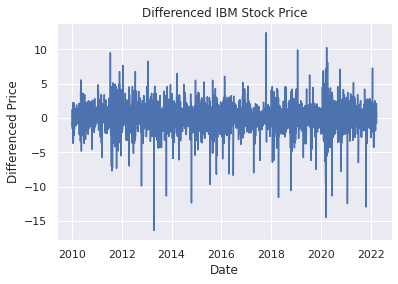

In [87]:
plt.plot(ibm_diff)
plt.title('Differenced IBM Stock Price')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.show()

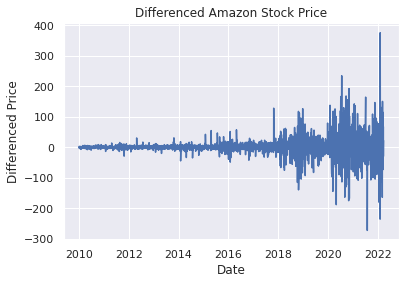

In [88]:
plt.plot(amzn_diff)
plt.title('Differenced Amazon Stock Price')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.show()

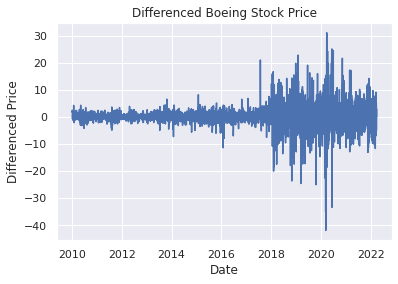

In [89]:
plt.plot(ba_diff)
plt.title('Differenced Boeing Stock Price')
plt.ylabel('Differenced Price')
plt.xlabel('Date')
plt.show()

As you can see in the above visualizations there are no increasing or decreasing trends in the stock price difference compared to the stock price. This will be better suited for our model later on.

In [90]:
pip install pmdarima

In [91]:
from pmdarima import auto_arima
import warnings 
warnings.filterwarnings("ignore")

In the following blocks of code below a stepwise function is used to find the best fitting PDQ values for our ARIMA model. Pretty efficient way about going about it. 

In the ARIMA model their are important variables needed and those include p,d and q.

Now that we have the difference in stock prices that makes our data stationary our value of d = 0. P refers to the number of lags of Y to be used as predictors. Q is the order of moving average (MA) term which refers to the number the lagged forecast errors that should go into the ARIMA Model. We will get the P and Q values from AR and MA components.

In [92]:
stepwise_fit = auto_arima(stock_prices.IBM, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12985.181, Time=6.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12992.155, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12992.397, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12992.436, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12990.157, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12995.940, Time=1.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12993.866, Time=1.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12991.725, Time=6.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12991.764, Time=8.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12994.055, Time=1.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12993.988, Time=2.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12996.217, Time=3.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=10.70 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=12978.326, Time=2.36 sec
 ARIMA(1,1,2)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3079
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6484.163
Date:                Wed, 30 Mar 2022   AIC                          12978.326
Time:                        04:03:51   BIC                          13008.487
Sample:                             0   HQIC                         12989.161
                               - 3079                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8185      0.030    -60.417      0.000      -1.877      -1.759
ar.L2         -0.9356      0.029    -32.400      0.000      -0.992      -0.879
ma.L1          1.8037      0.034     53.444      0.000       1.738       1.870
ma.L2          0.9135      0.033     27.841      0.000       0.849       0.978
sigma2         3.9564      0.047     84.185      0.000       3.864       4.049
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              7539.72
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.82
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
stepwise_fit = auto_arima(amzn_diff, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29680.694, Time=4.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=29689.022, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29688.381, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=29688.393, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29690.614, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29686.853, Time=2.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29687.009, Time=3.06 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=29676.035, Time=3.56 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=29674.034, Time=2.44 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=29672.577, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=29690.331, Time=0.29 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=29674.074, Time=0.49 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29676.082, Time=0.62 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=29674.995, Time=0.25 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3078
Model:               SARIMAX(3, 0, 0)   Log Likelihood              -14831.289
Date:                Wed, 30 Mar 2022   AIC                          29672.577
Time:                        04:04:17   BIC                          29702.738
Sample:                             0   HQIC                         29683.412
                               - 3078                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1394      0.546      2.086      0.037       0.069       2.210
ar.L1         -0.0288      0.007     -3.852      0.000      -0.043      -0.014
ar.L2          0.0017      0.009      0.190      0.850      -0.016       0.020
ar.L3         -0.0800      0.008     -9.811      0.000      -0.096      -0.064
sigma2       897.8878      7.497    119.762      0.000     883.193     912.582
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             48182.20
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):             114.60   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
stepwise_fit = auto_arima(ba_diff, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17796.221, Time=2.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17810.442, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17810.065, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17810.390, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17808.743, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=17794.959, Time=1.64 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=17793.487, Time=0.96 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=17795.281, Time=1.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=17803.465, Time=1.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=17796.768, Time=3.48 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=17791.738, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=17808.677, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=17793.217, Time=0.62 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=17793.535, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3078
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -8892.869
Date:                Wed, 30 Mar 2022   AIC                          17791.738
Time:                        04:04:45   BIC                          17809.834
Sample:                             0   HQIC                         17798.238
                               - 3078                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0271      0.007      3.908      0.000       0.014       0.041
ma.L2          0.0766      0.007     10.597      0.000       0.062       0.091
sigma2        18.9245      0.187    100.945      0.000      18.557      19.292
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             24592.92
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              31.38   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [96]:
from statsmodels.tsa.arima_model import ARIMA

Now we are splitting the data set between the test and the train data set for each stock price.

In [97]:
ibm_train = ibm_diff.iloc[:-30]
ibm_test = ibm_diff.iloc[-30:]
print(ibm_train.shape)
print(ibm_test.shape)

(3048,)
(30,)


In [98]:
amzn_train = amzn_diff.iloc[:-30]
amzn_test = amzn_diff.iloc[-30:]
print(amzn_train.shape)
print(amzn_test.shape)

(3048,)
(30,)


In [99]:
ba_train = ba_diff.iloc[:-30]
ba_test = ba_diff.iloc[-30:]
print(ba_train.shape)
print(ba_test.shape)

(3048,)
(30,)


In [100]:
ibm_model = sm.tsa.arima.ARIMA(ibm_train, order=(2,1,2))
ibm_model = ibm_model.fit()

In [101]:
ibm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    IBM   No. Observations:                 3048
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6437.289
Date:                Wed, 30 Mar 2022   AIC                          12884.579
Time:                        04:06:09   BIC                          12914.688
Sample:                             0   HQIC                         12895.401
                               - 3048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0163      0.017    -60.029      0.000      -1.049      -0.983
ar.L2         -0.0290      0.014     -2.116      0.034      -0.056      -0.002
ma.L1         -0.0080      0.031     -0.259      0.795      -0.069       0.053
ma.L2         -0.9919      0.033    -30.080      0.000      -1.057      -0.927
sigma2         3.9940      0.121     32.981      0.000       3.757       4.231
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7840.87
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
amzn_model = sm.tsa.arima.ARIMA(amzn_train, order=(3,0,0))
amzn_model = amzn_model.fit()
amzn_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   AMZN   No. Observations:                 3048
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14603.533
Date:                Wed, 30 Mar 2022   AIC                          29217.066
Time:                        04:07:19   BIC                          29247.177
Sample:                             0   HQIC                         29227.888
                               - 3048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9994      0.480      2.082      0.037       0.059       1.940
ar.L1         -0.0461      0.007     -6.282      0.000      -0.061      -0.032
ar.L2          0.0036      0.009      0.397      0.692      -0.014       0.022
ar.L3         -0.0729      0.008     -8.960      0.000      -0.089      -0.057
sigma2       850.1906      6.940    122.505      0.000     836.588     863.793
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             55061.58
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             122.94   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
ba_model = sm.tsa.arima.ARIMA(ba_train, order=(0,0,2))
ba_model = ba_model.fit()
ba_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     BA   No. Observations:                 3048
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -8795.721
Date:                Wed, 30 Mar 2022   AIC                          17599.442
Time:                        04:07:22   BIC                          17623.531
Sample:                             0   HQIC                         17608.099
                               - 3048                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0535      0.088      0.606      0.545      -0.120       0.227
ma.L1          0.0254      0.007      3.682      0.000       0.012       0.039
ma.L2          0.0767      0.007     10.577      0.000       0.062       0.091
sigma2        18.7950      0.186    101.120      0.000      18.431      19.159
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             25573.89
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              34.33   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
start = len(ibm_train)
end=len(ibm_train)+len(ibm_test)-1
ibm_pred=ibm_model.predict(start=start, end=end, type="levels")
#print(pred)
ibm_pred.index=stock_prices.IBM.index[start:end+1]
print(ibm_pred)

Date
2022-02-10    0.110827
2022-02-11    0.015786
2022-02-14   -0.014559
2022-02-15    0.019035
2022-02-16   -0.014227
2022-02-17    0.018604
2022-02-18   -0.013799
2022-02-22    0.018181
2022-02-23   -0.013382
2022-02-24    0.017769
2022-02-25   -0.012975
2022-02-28    0.017368
2022-03-01   -0.012579
2022-03-02    0.016977
2022-03-03   -0.012193
2022-03-04    0.016596
2022-03-07   -0.011818
2022-03-08    0.016226
2022-03-09   -0.011452
2022-03-10    0.015864
2022-03-11   -0.011095
2022-03-14    0.015512
2022-03-15   -0.010748
2022-03-16    0.015170
2022-03-17   -0.010410
2022-03-18    0.014836
2022-03-21   -0.010080
2022-03-22    0.014511
2022-03-23   -0.009759
2022-03-24    0.014194
Name: predicted_mean, dtype: float64


In [105]:
start = len(amzn_train)
end=len(amzn_train)+len(amzn_test)-1
amzn_pred=amzn_model.predict(start=start, end=end, type="levels")
#print(pred)
amzn_pred.index=stock_prices.AMZN.index[start:end+1]
print(amzn_pred)

Date
2022-02-10   -1.953500
2022-02-11    1.372602
2022-02-14    4.230547
2022-02-15    1.066855
2022-02-16    0.980822
2022-02-17    0.765020
2022-02-18    1.005232
2022-02-22    0.999634
2022-02-23    1.016492
2022-02-24    0.998187
2022-02-25    0.999501
2022-02-28    0.998145
2022-03-01    0.999547
2022-03-02    0.999381
2022-03-03    0.999493
2022-03-04    0.999385
2022-03-07    0.999402
2022-03-08    0.999393
2022-03-09    0.999402
2022-03-10    0.999400
2022-03-11    0.999401
2022-03-14    0.999400
2022-03-15    0.999400
2022-03-16    0.999400
2022-03-17    0.999400
2022-03-18    0.999400
2022-03-21    0.999400
2022-03-22    0.999400
2022-03-23    0.999400
2022-03-24    0.999400
Name: predicted_mean, dtype: float64


In [106]:
start = len(ba_train)
end=len(ba_train)+len(ba_test)-1
ba_pred=ba_model.predict(start=start, end=end, type="levels")
#print(pred)
ba_pred.index=stock_prices.BA.index[start:end+1]
print(ba_pred)

Date
2022-02-10    0.281753
2022-02-11    0.260271
2022-02-14    0.053466
2022-02-15    0.053466
2022-02-16    0.053466
2022-02-17    0.053466
2022-02-18    0.053466
2022-02-22    0.053466
2022-02-23    0.053466
2022-02-24    0.053466
2022-02-25    0.053466
2022-02-28    0.053466
2022-03-01    0.053466
2022-03-02    0.053466
2022-03-03    0.053466
2022-03-04    0.053466
2022-03-07    0.053466
2022-03-08    0.053466
2022-03-09    0.053466
2022-03-10    0.053466
2022-03-11    0.053466
2022-03-14    0.053466
2022-03-15    0.053466
2022-03-16    0.053466
2022-03-17    0.053466
2022-03-18    0.053466
2022-03-21    0.053466
2022-03-22    0.053466
2022-03-23    0.053466
2022-03-24    0.053466
Name: predicted_mean, dtype: float64


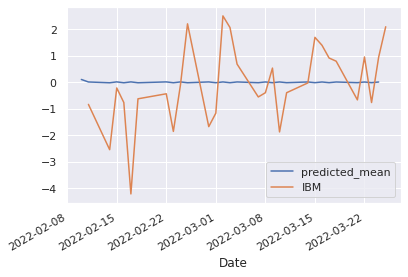

In [107]:
ibm_pred.plot(legend=True)
ibm_test.plot(legend=True)

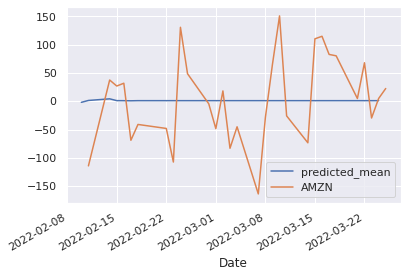

In [108]:
amzn_pred.plot(legend=True)
amzn_test.plot(legend=True)

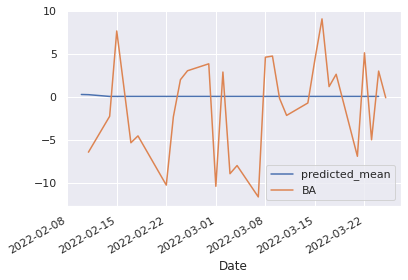

In [109]:
ba_pred.plot(legend=True)
ba_test.plot(legend=True)

In [110]:
from sklearn.metrics import mean_squared_error
from math import sqrt
ibm_rmse=sqrt(mean_squared_error(ibm_pred,ibm_test))
print(ibm_rmse)

1.5020346210075957


In [111]:
amzn_rmse=sqrt(mean_squared_error(amzn_pred,amzn_test))
print(amzn_rmse)

75.6726980592916


In [112]:
ba_rmse=sqrt(mean_squared_error(ba_pred,ba_test))
print(ba_rmse)

5.68437286784622


In [113]:
ibm_test.mean()

-0.07233327229817708

In [114]:
amzn_test.mean()

3.846663411458333

In [115]:
ba_test.mean()

-0.9933334350585937

In [116]:
model2 = sm.tsa.arima.ARIMA(stock_prices.IBM, order=(2,0,2))
model2 = model2.fit()

In [117]:
model3 = sm.tsa.arima.ARIMA(stock_prices.AMZN, order=(3,0,0))
model3 = model3.fit()

In [118]:
model4 = sm.tsa.arima.ARIMA(stock_prices.BA, order=(0,0,2))
model4 = model4.fit()

In [124]:
index_future_dates=pd.date_range(start='2022-03-24', end='2022-04-23')
#print(index_future_dates)
ibm_pred2=model2.predict(start=len(stock_prices.IBM), end=len(stock_prices.IBM)+30, typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
ibm_pred2.index=index_future_dates
print(ibm_pred2)

2022-03-24    131.368889
2022-03-25    131.446985
2022-03-26    131.508402
2022-03-27    131.565918
2022-03-28    131.622415
2022-03-29    131.678544
2022-03-30    131.734453
2022-03-31    131.790176
2022-04-01    131.845720
2022-04-02    131.901087
2022-04-03    131.956280
2022-04-04    132.011297
2022-04-05    132.066141
2022-04-06    132.120811
2022-04-07    132.175307
2022-04-08    132.229631
2022-04-09    132.283784
2022-04-10    132.337764
2022-04-11    132.391574
2022-04-12    132.445214
2022-04-13    132.498684
2022-04-14    132.551984
2022-04-15    132.605116
2022-04-16    132.658080
2022-04-17    132.710876
2022-04-18    132.763504
2022-04-19    132.815967
2022-04-20    132.868263
2022-04-21    132.920393
2022-04-22    132.972359
2022-04-23    133.024160
Freq: D, Name: ARIMA Predictions, dtype: float64


In [125]:
index_future_dates=pd.date_range(start='2022-03-24', end='2022-04-23')
#print(index_future_dates)
amzn_pred2=model3.predict(start=len(stock_prices.AMZN), end=len(stock_prices.AMZN)+30, typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
amzn_pred2.index=index_future_dates
print(amzn_pred2)

2022-03-24    3294.435782
2022-03-25    3294.151342
2022-03-26    3293.718368
2022-03-27    3293.293682
2022-03-28    3292.868044
2022-03-29    3292.442561
2022-03-30    3292.017154
2022-03-31    3291.591830
2022-04-01    3291.166588
2022-04-02    3290.741429
2022-04-03    3290.316353
2022-04-04    3289.891360
2022-04-05    3289.466449
2022-04-06    3289.041621
2022-04-07    3288.616875
2022-04-08    3288.192212
2022-04-09    3287.767631
2022-04-10    3287.343133
2022-04-11    3286.918718
2022-04-12    3286.494385
2022-04-13    3286.070135
2022-04-14    3285.645967
2022-04-15    3285.221881
2022-04-16    3284.797878
2022-04-17    3284.373958
2022-04-18    3283.950120
2022-04-19    3283.526364
2022-04-20    3283.102691
2022-04-21    3282.679100
2022-04-22    3282.255591
2022-04-23    3281.832165
Freq: D, Name: ARIMA Predictions, dtype: float64


In [126]:
index_future_dates=pd.date_range(start='2022-03-24', end='2022-04-23')
#print(index_future_dates)
ba_pred2=model4.predict(start=len(stock_prices.BA), end=len(stock_prices.BA)+30, typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
ba_pred2.index=index_future_dates
print(ba_pred2)

2022-03-24    188.412545
2022-03-25    171.366402
2022-03-26    172.529266
2022-03-27    172.529266
2022-03-28    172.529266
2022-03-29    172.529266
2022-03-30    172.529266
2022-03-31    172.529266
2022-04-01    172.529266
2022-04-02    172.529266
2022-04-03    172.529266
2022-04-04    172.529266
2022-04-05    172.529266
2022-04-06    172.529266
2022-04-07    172.529266
2022-04-08    172.529266
2022-04-09    172.529266
2022-04-10    172.529266
2022-04-11    172.529266
2022-04-12    172.529266
2022-04-13    172.529266
2022-04-14    172.529266
2022-04-15    172.529266
2022-04-16    172.529266
2022-04-17    172.529266
2022-04-18    172.529266
2022-04-19    172.529266
2022-04-20    172.529266
2022-04-21    172.529266
2022-04-22    172.529266
2022-04-23    172.529266
Freq: D, Name: ARIMA Predictions, dtype: float64


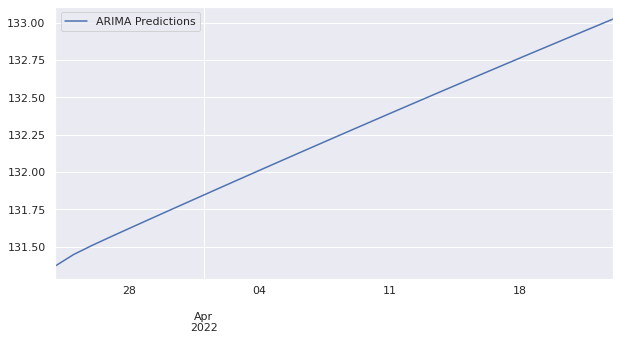

In [127]:
ibm_pred2.plot(figsize=(10,5), legend=True)

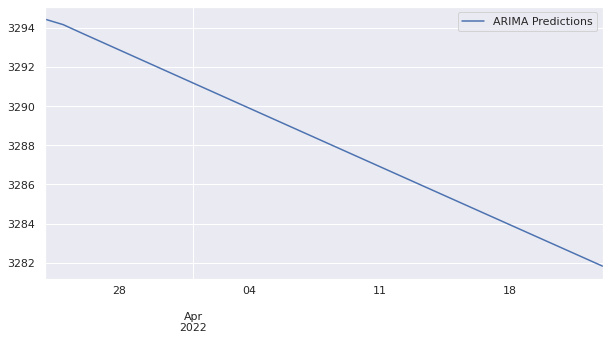

In [128]:
amzn_pred2.plot(figsize=(10,5), legend=True)

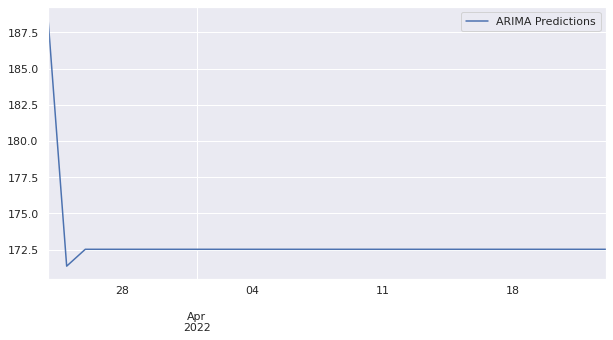

In [129]:
ba_pred2.plot(figsize=(10,5), legend=True)